# Modelo de recuperación de Oro

Tenemos los datos de limpieza para el proceso de concentración de oro en una mina, entrenaremos un modelo que prediga los valores de recuperación de acuerdo a las características de entrada. Empezaremos explorando, y preparando nuestros datos. 

Procederemos a analizar los datos revisando las concentraciones y tamaños de las partículas, posteriormente iremos con el proceso de entrenamiento de modelos eligiendo un modelo de bosques aleatorios como el mejor.

## Preparación de datos

Empezaremos cargando las librerías que usaremos: pandas para los datos, seaborn para usar el heatmap y typing para la función de sMAPE. También importaremos varias funciones de sklearn para trabajar.

In [147]:
import pandas as pd
import seaborn as sns
import typing
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

Ahora cargaremos los tres datasets que corresponden al proceso completo del tratamiento de oro.

### Cargada y exploración de datos

In [148]:
# Importamos los datasets

df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")

Veamos un sample de cada una.

In [149]:
print("full")
display(df_full.sample(n=5, random_state=1))
print("-"*20)

print("train")
display(df_train.sample(n=5, random_state=1))
print("-"*20)

print("test")
display(df_test.sample(n=5, random_state=1))


full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1822,2016-03-30 22:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,4.595555e-17,-799.575629,2.556404e-20,-516.730770,-0.170163,-794.075006,0.640000,-799.972478,0.247447,-799.801811
21210,2018-06-16 17:59:59,4.114105,12.034119,6.601648,45.030506,64.600108,8.489599,2.452024,9.813269,1.919503,...,2.703111e+01,-499.994530,1.997691e+01,-499.887971,17.988470,-499.981665,13.982197,-500.014858,14.013536,-499.911367
1027,2016-02-26 19:00:00,4.635009,12.403052,12.291982,42.955547,70.826909,12.835478,2.655428,11.480825,3.327140,...,1.404491e+01,-500.152424,1.395866e+01,-499.744331,12.012848,-500.157806,9.973915,-499.890445,20.074320,-499.973305
14826,2017-09-23 17:59:59,3.839946,11.964491,6.879474,46.453698,79.612055,3.725731,2.040084,8.320761,1.822199,...,1.498885e+01,-497.655570,1.296261e+01,-396.455044,11.039779,-499.971138,9.005702,-499.364841,12.017806,-499.820217
7573,2016-11-25 12:59:59,5.946827,9.011007,12.198356,44.534894,69.021231,10.284976,3.029186,11.305097,3.534163,...,1.800779e+01,-499.783456,1.599795e+01,-499.865052,17.577007,-500.131481,11.990774,-500.383920,22.001923,-500.922683


--------------------
train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15374,2018-06-17 13:59:59,3.870385,12.346517,6.481464,45.152143,64.534992,7.725065,2.873893,7.811544,2.178199,...,27.001209,-496.696147,1.995270e+01,-629.482446,17.938792,-499.846037,13.983720,-500.107836,14.007579,-499.545924
7768,2017-04-04 15:59:59,6.666505,11.283040,8.978644,41.675727,64.298777,9.227691,3.431319,7.412458,3.212361,...,25.005296,-399.778748,2.295283e+01,-399.644052,22.873958,-450.313833,18.337711,-450.156483,30.026593,-500.021347
4280,2016-07-11 07:59:59,5.970248,7.851370,15.681604,44.617581,63.126832,7.529522,1.716333,9.864737,2.423701,...,14.981368,-400.760429,4.909087e+00,-399.947179,9.993694,-399.629200,5.013971,-400.068206,24.971998,-449.725339
5834,2017-01-14 01:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,1.441671e-17,-799.888481,-0.129215,-794.351171,0.614436,-799.949420,0.227492,-809.739954
15962,2018-07-12 01:59:59,3.154823,11.624484,6.704018,46.014930,67.002276,10.223488,4.206759,7.963597,1.935645,...,20.966101,-500.529369,1.789922e+01,-500.095838,14.987784,-500.175685,11.001439,-499.973005,12.986881,-499.621268


--------------------
test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
222,2016-09-10 06:59:59,96.891268,6.645360,7.675,0.676437,1299.580550,-500.189539,1299.913851,-500.180428,1297.267716,...,8.083034,-500.291313,4.991884,-500.196025,7.938336,-499.493318,2.993399,-500.529518,19.970367,-600.404445
2326,2016-12-06 22:59:59,223.841541,8.475190,7.150,1.332286,1503.512713,-500.094348,1500.281851,-499.944895,1495.406609,...,17.984736,-499.534940,15.859214,-499.899218,16.902982,-499.874220,11.994777,-499.715904,21.007944,-499.686986
2162,2016-11-30 02:59:59,215.411735,6.904480,7.131,1.485870,1502.633421,-499.768321,1501.861902,-500.147942,1498.363430,...,18.014956,-501.419870,15.968955,-499.939636,17.967567,-499.097740,12.028764,-499.851818,21.994603,-498.626647
2363,2016-12-08 11:59:59,183.673159,8.898937,7.470,0.998338,1498.724556,-499.833651,1497.069362,-499.067684,1502.580044,...,18.028213,-499.445021,15.942995,-498.618973,15.691574,-499.598233,12.046046,-500.212092,20.994323,-500.045913
5651,2017-12-23 11:59:59,211.498632,14.991006,7.500,1.280261,1603.525438,-499.618692,1601.790866,-494.170322,1390.131791,...,19.977751,-500.407278,15.078257,-500.417017,10.984525,-502.790332,8.155172,-500.787611,12.001650,-501.699719


Ahora veamos como estan las longitudes y algo de información sobre los datos y columnas.

In [150]:
display(
    pd.DataFrame(
        {
            "Datasets": ["full", "train", "test"],
            "Longitud": [df_full.shape[0], df_train.shape[0], df_test.shape[0]],
            "Nulos": [
                df_full[df_full.isnull().any(axis=1)].shape[0],
                df_train[df_train.isnull().any(axis=1)].shape[0],
                df_test[df_test.isnull().any(axis=1)].shape[0]
                ],
            "Proporción de nulos": [
                df_full.isnull().any(axis=1).mean(),
                df_train.isnull().any(axis=1).mean(),
                df_test.isnull().any(axis=1).mean()
                ],
        }
    )
)
print("-"*20, "\nFull")
df_full.info()
print("-"*20, "\nTest")
df_test.info()
print("-"*20, "\nTrain")
df_train.info()


,Datasets,Longitud,Nulos,Proporción de nulos
0,full,22716,6622,0.291513
1,train,16860,5843,0.346560
2,test,5856,473,0.080772


-------------------- 
Full
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                            

Tenemos tres datasets: el de entrenamiento, el de testing y el full, los cuales tienen algunos valores nulos. Es bastante claro que tenemos una gran proporción de nulos, pero esto es porque en ocasiones los datos no se tienen para todos los momentos del proceso. En esto, tenemos que tomar los vecinos a ese punto (por ejemplo, antes o después) para imputar; haremos esto, pero primero cambiaremos un poco como esta la información, primero cambiaremos el tipo de `date` de object a datetime.

In [151]:
# Convertamos a datetime

df_full.date = pd.to_datetime(df_full['date'])
df_train.date = pd.to_datetime(df_train['date'])
df_test.date = pd.to_datetime(df_test['date'])

Ahora, veamos cuales son las columnas que no están en el conjunto de prueba.

In [152]:
# Usamos sets porque es más simple de realizar

set(list(df_full.columns)) - set(list(df_test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Los valores que hacen falta en el conjunto de prueba son los _outputs_, tiene sentido ya que en el conjunto de prueba lo que haremos será modelar el sistema para obtener esos valores: agregaremos las columnas de `'final.output.recovery'` y `'rougher.output.recovery'` al dataset de prueba, lo cual es necesario para hacer las métricas de predicción. 

In [153]:
# Obtenemos los índices necesarios
test_indexes = list(df_test.set_index("date").index)

# Que columnas se afectaran
col_targets = ["rougher.output.recovery", "final.output.recovery"]

# Agregamos estos valores con el índice date
df_test_temp = df_test.set_index("date")
df_test_temp[col_targets] = df_full.set_index("date").loc[test_indexes][col_targets]
df_test = df_test_temp.reset_index()

Perfecto, continuaremos revisando que el valor de recuperación del conjunto de entrenamiento esta correctamente calculado.

### Porcentaje de recuperación

Recordemos la fórmula:

$$
Recuperación(\%) = \frac{C\cdot(F-T)}{F\cdot(C-T)} \cdot 100
$$

donde _C_ es la proporción de oro después de la alimentación, _F_ es la proporción de oro antes de, y _T_ es la proporción de oro en la cola después de la purificación. Calcularemos esto y lo compararemos con el valor obtenido para el _rougher_, que se halla en `rougher.output.recovery`.

Una aclaración antes de hacer esto, en la fórmula tenemos **proporciones**, pero en las columnas tenemos unidades, sin embargo, como obtener la proporción es simplemente dividir cada elemento por el total en unidades, al factorizar se perderían esos términos y podemos usar los valores que tenemos.

In [154]:
# Primero definamos una copia de df_train en donde crearemos una columna con el valor calculado
df_train_eam = df_train.copy()

# Feeder
F = df_train_eam["rougher.input.feed_au"]

#Concentrate
C = df_train_eam["rougher.output.concentrate_au"]

# Tail
T = df_train_eam["rougher.output.tail_au"]

# Calculemos la métrica necesaria
df_train_eam["recuperacion_redux"] = 100*(C*F-C*T)/(C*F-F*T)

# Mostremos en pantalla lo que tenemos
display(
    df_train_eam[["rougher.output.recovery", "recuperacion_redux"]].sample(n=10, random_state=2)
)

,rougher.output.recovery,recuperacion_redux
11517,NaN,NaN
363,78.667325,78.667325
15343,86.212829,86.212829
11309,80.003047,80.003047
11666,93.391629,93.391629
12775,92.166727,92.166727
9134,NaN,NaN
7025,91.523241,91.523241
2652,72.638667,72.638667
2125,78.613657,78.613657


Mostramos un sample de algunos elementos con el valor original y el valor calculado: se ven casi idénticos. Calculemos el EAM, pero descartemos los valores con algún nulo (ya que no se puede calcular con ellos).

In [155]:
print("El valor del error absoluto medio es")
mean_absolute_error(
    df_train_eam.dropna()["rougher.output.recovery"], df_train_eam.dropna()["recuperacion_redux"]
)

El valor del error absoluto medio es


1.1854001487397401e-14

Un valor tan pequeño indica que realmente no tenemos nada de que preocuparnos, los valores están bien. Procedamos a estudiar lo que pasa con los valores faltantes.

### Valores faltantes

Anteriormente indicamos que existen muchos valores nulos en nuestros datasets, como sabemos de antemano que los valores son muy similares en posiciones temporales cercanas, usaremos el método de imputación Forward Fill para tomar el último valor anterior.

In [156]:
# Usemos fillna para esto

df_train_filled = df_train.fillna(method='ffill', axis=0)
df_test_filled = df_test.fillna(method='ffill', axis=0) 
df_full_filled = df_full.fillna(method='ffill', axis=0) 

Ya tenemos los datos completos con esto, podemos proceder con el análisis de datos.

## Análisis de datos

Continuaremos haciendo un análisis de nuestros datos: revisaremos como se distribuya la concentración de los elementos en las étapas sucesivas, y luego veremos como se distribuye el tamaño de las partículas en los dos conjuntos que tenemos.

### Concentración según la étapa de purificación

Mostraremos las gráficas que corresponden a la concentración por étapa.

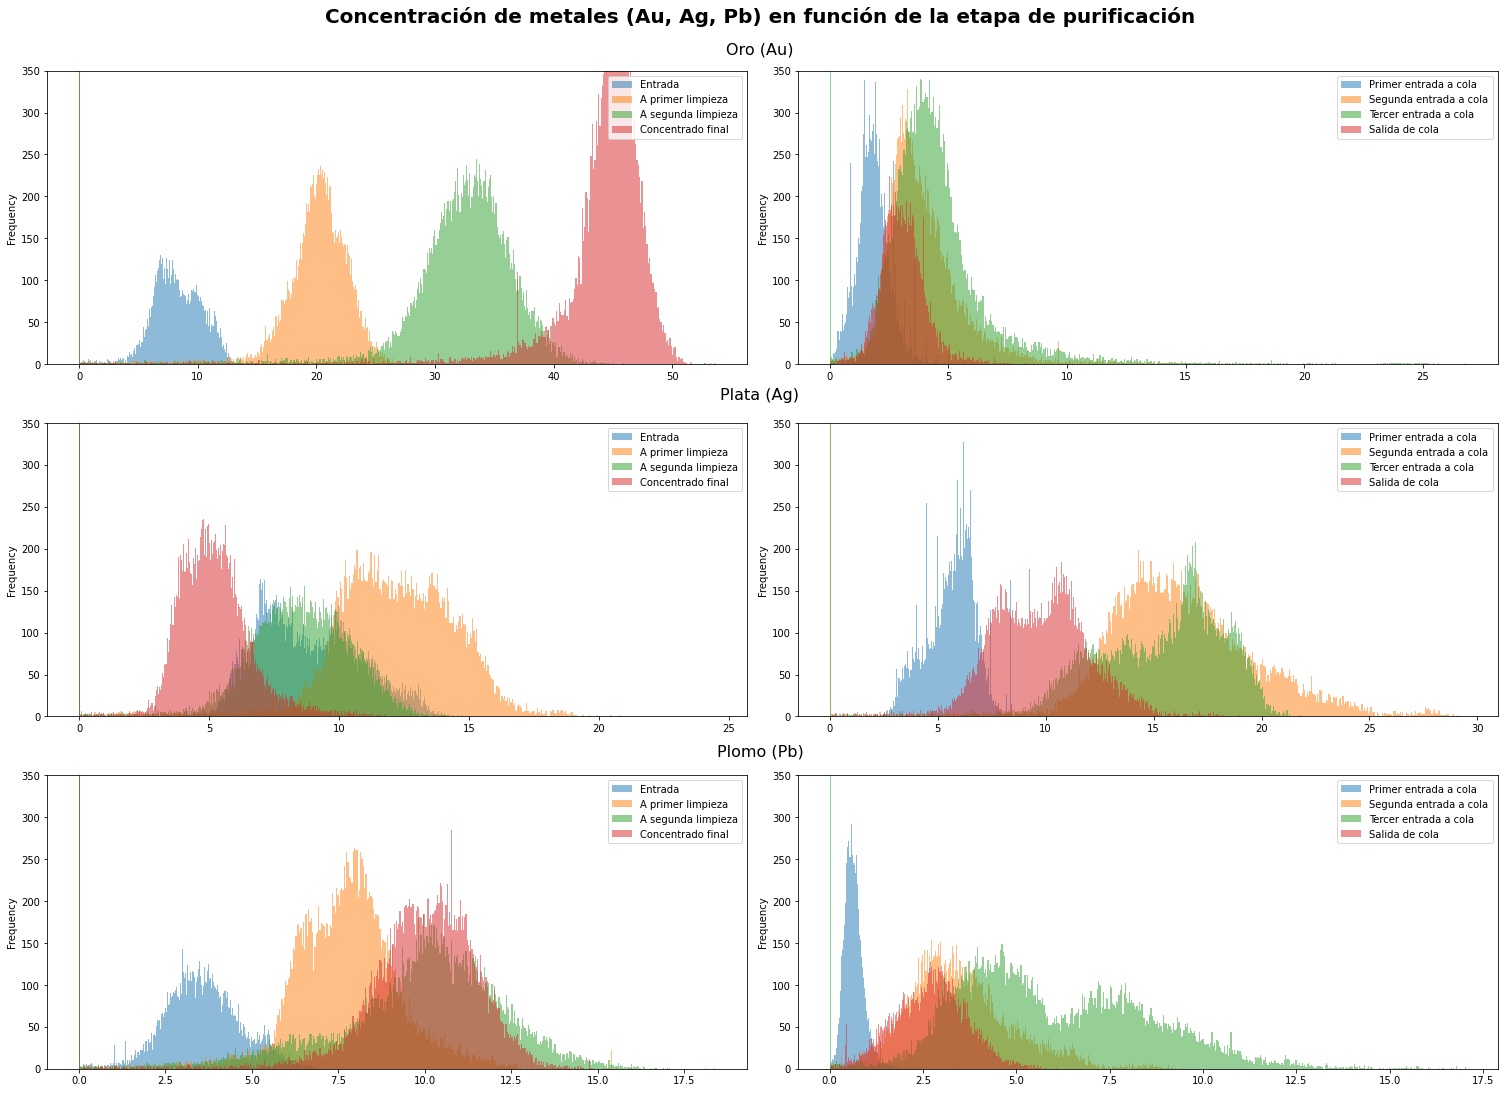

In [157]:
# Contenedor para el loop
ax_counter = 0

# Creamos los contenedores de la figura
fig, axes = plt.subplots(3, 2, figsize=(21, 15))
axes = axes.flatten()

# Creamos el loop de los datos, todos los valores en dos plots por material
for item in ["au", "ag", "pb"]:
    # Definamos columnas para el primer brazo
    columnas_concentrado = [
        f"rougher.input.feed_{item}",
        f"rougher.output.concentrate_{item}",
        f"primary_cleaner.output.concentrate_{item}",
        f"final.output.concentrate_{item}"
    ]

    # Columnas para la cola
    columnas_cola = [
        f"rougher.output.tail_{item}",
        f"primary_cleaner.output.tail_{item}",
        f"secondary_cleaner.output.tail_{item}",
        f"final.output.tail_{item}"
    ]    

    for column in columnas_concentrado:
        df_full_filled[column].plot(kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[ax_counter])
    ax_counter = ax_counter + 1
        
    for column in columnas_cola:
        df_full_filled[column].plot(kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[ax_counter])
    ax_counter = ax_counter + 1

# Creamos las leyendas
for item in [0, 2, 4]:
    axes[item].legend([
        "Entrada", "A primer limpieza", "A segunda limpieza", "Concentrado final"
    ], loc=1)
    axes[item].set_ylim(0,350)
    
    axes[item+1].legend([
        "Primer entrada a cola", "Segunda entrada a cola", "Tercer entrada a cola", "Salida de cola"
    ], loc=1)
    axes[item+1].set_ylim(0,350)

# Adecuaciones a las gráficas

plt.figtext(0.505, 1, "Concentración de metales (Au, Ag, Pb) en función de la etapa de purificación", ha='center', va='center', fontsize=20, weight=600)

plt.figtext(0.505, 0.97, "Oro (Au)", ha='center', va='center', fontsize=16, weight=400)
plt.figtext(0.505, 0.65, "Plata (Ag)", ha='center', va='center', fontsize=16, weight=400)
plt.figtext(0.505, 0.32, "Plomo (Pb)", ha='center', va='center', fontsize=16, weight=400)

plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.95)

# Mostrando
plt.show()

Graficamos los histogramas para los cuatro pasos de limpieza en el concentrado Rougher y los cuatro de la cola de limpieza. Para el oro, podemos ver que conforme para la limpieza se va desplazando el histograma de la proporción de oro para tener más en el concentrado: esto tiene sentido, queremos obtener más oro al final de estos pasos; en el caso de la colas, la proporción de oro no varia demasiado: el pico se mueve un poco en las étapas, pero no es al grado que sucede en el concentrado.

Para la plata, se aprecia que la concentración es un poco errática: el concentrado final tiene menos proporción que la entrada, y la cola aumenta igual más que la salida. Sucede algo similar en el caso del plomo, la concentración igual aumenta al final en relación al final.

Finalmente, en los tres elementos se tienen picos marcados cerca del cero, lo cual causa un poco de ruido.

### Tamaño de las partículas

Haremos los mismo que antes, pero para el tamaño de las partículas.

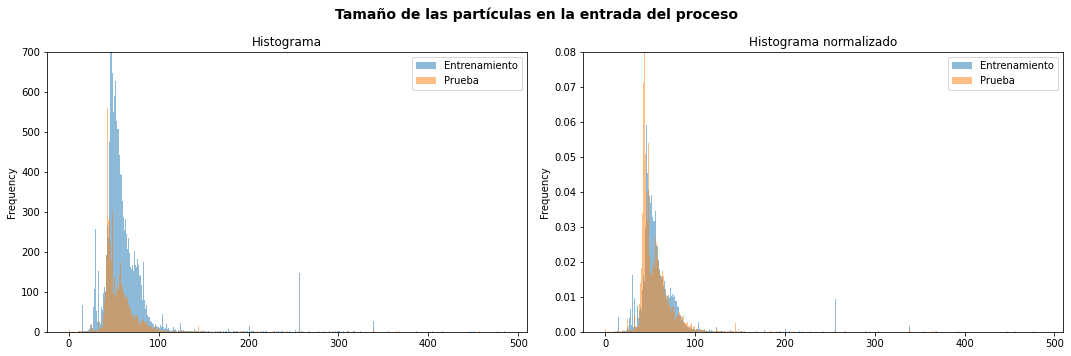

In [158]:
# Creamos los elementos del plot
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = axes.flatten()

# Ploteo nominal
df_train_filled["rougher.input.feed_size"].plot(
    kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[0]
)
df_test_filled["rougher.input.feed_size"].plot(
    kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[0]
)

# Ploteo normalizado
df_train_filled["rougher.input.feed_size"].plot(
    kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[1], density=True
)
df_test_filled["rougher.input.feed_size"].plot(
    kind="hist", legend=True, alpha=0.5, bins=500, ax=axes[1], density=True
)

# Leyendas
axes[0].legend(["Entrenamiento", "Prueba"])
axes[1].legend(["Entrenamiento", "Prueba"])

# Límites
axes[0].set_ylim(0, 700)
axes[1].set_ylim(0, 0.08)

# Títulos
axes[0].set_title("Histograma")
axes[1].set_title("Histograma normalizado")

plt.suptitle("Tamaño de las partículas en la entrada del proceso", fontsize=14, weight=600)
plt.tight_layout()

# Mostramos
plt.show()

Tenemos dos histogramas, el normal y el normalizado: la razón de esto es que los dos conjuntos tienen diferente números de datos. Podemos apreciar que la distribución es similar, por lo que podemos decir que el tamaño de las partículas es parecida en ambos datasets.

### Concentraciones totales por étapa

Ahora mostraremos el material total en tres étapas del proceso; sumaremos el material para todos los elementos y veremos como progresa.

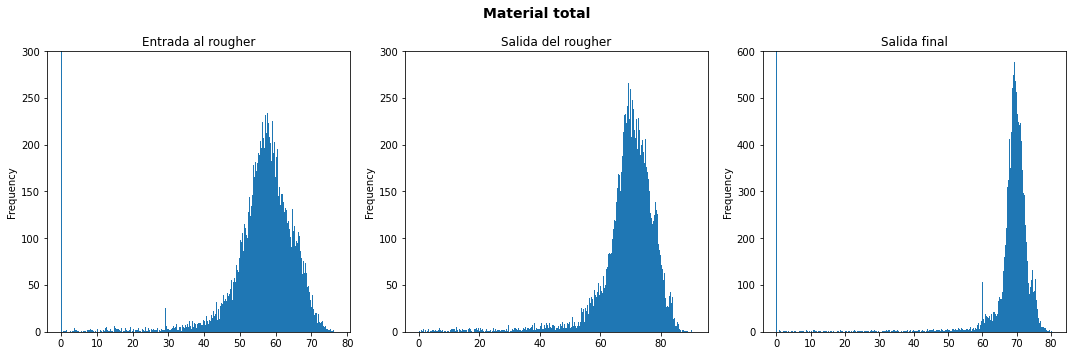

In [159]:
columnas_entrada = [
    "rougher.input.feed_au", "rougher.input.feed_ag", "rougher.input.feed_pb", 'rougher.input.feed_sol'
]

columnas_salida = [
    "rougher.output.concentrate_au",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_sol"
]

columnas_final = [
    "final.output.concentrate_au",
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol"
]

# Creamos los elementos del plot
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes = axes.flatten()

# ploteos
df_full_filled[columnas_entrada].sum(axis=1).plot(kind="hist", bins=500, ax=axes[0])
df_full_filled[columnas_salida].sum(axis=1).plot(kind="hist", bins=500, ax=axes[1])
df_full_filled[columnas_final].sum(axis=1).plot(kind="hist", bins=500, ax=axes[2])

# limites
axes[0].set_ylim(0, 300)
axes[1].set_ylim(0, 300)
axes[2].set_ylim(0, 600)

# Títulos
axes[0].set_title("Entrada al rougher")
axes[1].set_title("Salida del rougher")
axes[2].set_title("Salida final")

plt.suptitle("Material total", fontsize=14, weight=600)

plt.tight_layout()
plt.show()

Podemos apreciar que la curva del histograma se va adelgazando conforme el proceso avanza: es normal, parte del material va saliendo y se concentra. Sin embargo, hay unos picos poco amigables cerca del cero, los cuales nos causan algo de problema ya que indicarían momentos cuando no hay material registrado: esto no tiene sentido, los eliminaremos.

In [160]:
# Restrinjamos a solo aquellas que la suma sea mayor a cero
df_train_final = df_train_filled[df_train_filled[columnas_entrada].sum(axis=1)>0]
df_train_final = df_train_final[df_train_final[columnas_salida].sum(axis=1)>0]
df_train_final = df_train_final[df_train_final[columnas_final].sum(axis=1)>0]

# Veamos que tenemos
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15128 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                15128 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         15128 non-null  float64       
 2   final.output.concentrate_pb                         15128 non-null  float64       
 3   final.output.concentrate_sol                        15128 non-null  float64       
 4   final.output.concentrate_au                         15128 non-null  float64       
 5   final.output.recovery                               15128 non-null  float64       
 6   final.output.tail_ag                                15128 non-null  float64       
 7   final.output.tail_pb                                15128 non-null  float64       
 8   final.

Se ve más limpio, no hay valores nulos en el entrenamiento, hagamos lo mismo para el conjunto de prueba.

In [161]:
# Restrinjamos a solo aquellas que la suma sea mayor a cero
df_test_final = df_test_filled[df_test_filled[columnas_entrada].sum(axis=1)>0]

# Veamos que tenemos
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5485 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5485 non-null   float64       
 2   primary_cleaner.input.depressant            5485 non-null   float64       
 3   primary_cleaner.input.feed_size             5485 non-null   float64       
 4   primary_cleaner.input.xanthate              5485 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5485 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5485 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5485 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5485 non-null   float64       
 9   primary_

Todo mejor, continuemos con el modelado.

## Modelación de datos

Entrenaremos dos tipos de modelos, de árboles de decisión y bosque aleatorio. Antes de esto, sin embargo, definiremos la función calculadora del sMAPE que usaremos más adelante.

### Función calculadora del sMAPE

Se define el sMAPE (Symmetric mean absolute percentage error), que es una métrica similar al MAPE que evita problemas con los ceros.
$$
sMAPE(\%) = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} \cdot 100
$$

In [162]:
def function_smape_score(real, predicted, column_name="ignore"):
    # Cálculos
    numerador = np.abs(real-predicted)
    denominador = np.abs(real)+np.abs(predicted)
    n_elementos = len(real)
    
    if column_name == "ignore":
        return ((200/n_elementos)*(numerador/denominador)).sum()
    else:
        return ((200/n_elementos)*(numerador/denominador))[column_name].sum()


Veamos que funciona con un set de prueba

In [163]:
# Prueba
function_smape_score(pd.Series([4,5,6]), pd.Series([4,6,5]))

12.121212121212123

Todo se ve en órden, podemos continuar.

### Exploración de modelos

En este momento, trabajaremos con el dataset de prueba y entrenamiento: antes de hacerlo, removeremos algunas columnas: quitaremos las fechas ya que no las necesitamos más, y elegiremos las columnas de características y objetvos.

In [164]:
# Solo el recovery
col_targets = ["rougher.output.recovery", "final.output.recovery"]

# Usaremos el df de test para saber que columnas tener de features, menos los no necesitadas
col_features = list(
    df_test_final.drop(["rougher.output.recovery", "final.output.recovery","date"], axis=1).columns
)

# Veamos que tenemos
col_features


['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

Son bastantes columnas, pero con esto ya podemos definir que queremos utilizar para el entrenamiento. Ahora, empezaremos entrenando el modelo de árboles de decisión variando la profundidad.

In [165]:
# Cambiaremos algunos parámetros
scores =[]

list_depths = [2**x for x in range(2,10)]

for curr_depth in list_depths:
    model_decisionTree = DecisionTreeRegressor(
        random_state=1, max_depth=curr_depth
    )

    scores.append(
        cross_val_score(
            model_decisionTree, df_train_final[col_features], df_train_final[col_targets]
        ).mean()
    )


In [166]:
# Grafiquemos
#fig, ax = plt.subplots(figsize=(15, 5))

#plt.scatter(list_depths, scores)
#plt.xticks(list_depths)
#plt.title("$R^2$ para regresor de Árboles de decisión")
#plt.show()

# Mostremos los resultados
pd.DataFrame(
    {
        "Depth": [2**x for x in range(2,10)],
        "R2": scores
    }
)

,Depth,R2
0,4,-0.095374
1,8,-0.376038
2,16,-1.356214
3,32,-1.099226
4,64,-1.109225
5,128,-1.109225
6,256,-1.109225
7,512,-1.109225


Una tabla así indica claramente que el valor de $R^2$ va cayendo: nuestro modelo no es para nada útil en este caso; esto es conocido, Árboles de decisión es propenso a _overfitting_ y por eso la predicción es tan mala. Procederemos a intentar con modelos de Bosques aleatorios: un poco más demandante, pero proporciona usualmente mejores resultados.

In [167]:
# Cambiaremos algunos parámetros
scores_forest = pd.DataFrame()

list_depths = [2**x for x in range(2,6)]
list_estimators = [2**x for x in range(2,6)]

# Definamos estas métricas
scoring = {
    "r2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
    #"SMAPE_final_output": make_scorer(function_smape_score, column_name = "final.output.recovery"),
    #"SMAPE_rougher_output": make_scorer(function_smape_score, column_name = "rougher.output.recovery")
}

# Hagamos el loop
for curr_estimator in list_estimators:
    for curr_depth in list_depths:
        model_randomForest = RandomForestRegressor(
            random_state=1, max_depth=curr_depth, n_estimators= curr_estimator
        )
        
        curr_metrics = cross_validate(
            model_randomForest,
            df_train_final[col_features],
            df_train_final[col_targets],
            scoring=scoring
        )
        
        scores_forest = scores_forest.append(
            {
                "Depth": curr_depth,
                "Estimators": curr_estimator,
                "R2": (-1 * curr_metrics["test_r2"]).mean(),
                "MAE": (-1 * curr_metrics["test_MAE"]).mean(),
                "RMSE": (-1 * curr_metrics["test_RMSE"]).mean()
                #"sMAPE": (
                #    0.25*curr_metrics["test_SMAPE_rougher_output"] + 0.75*curr_metrics["test_SMAPE_final_output"]
                #).mean()
            },
            ignore_index=True
        )
        

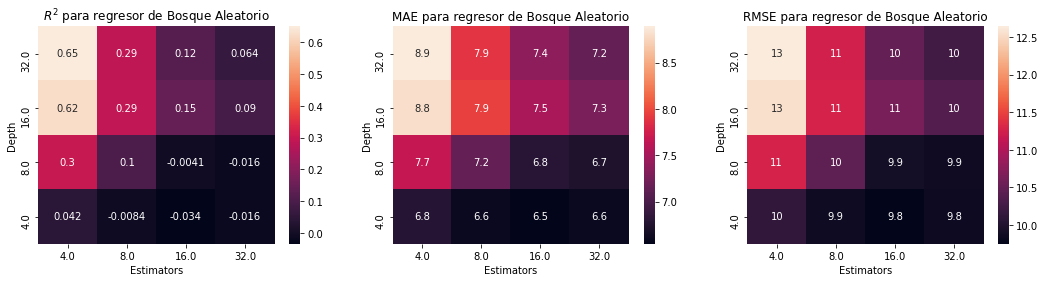

In [168]:
# Grafiquemos
fig, ax = plt.subplots(1,3, figsize=(18, 4))
ax = ax.flatten()

sns.heatmap(
    scores_forest.pivot_table(values="R2", index="Depth", columns="Estimators").sort_values(by="Depth", ascending=False),
    annot=True,
    ax=ax[0]
)
ax[0].set_title("$R^2$ para regresor de Bosque Aleatorio")
    
sns.heatmap(
    scores_forest.pivot_table(values="MAE", index="Depth", columns="Estimators").sort_values(by="Depth", ascending=False),
    annot=True,
    ax=ax[1]
)
ax[1].set_title("MAE para regresor de Bosque Aleatorio")

sns.heatmap(
    scores_forest.pivot_table(values="RMSE", index="Depth", columns="Estimators").sort_values(by="Depth", ascending=False),
    annot=True,
    ax=ax[2]
)
ax[2].set_title("RMSE para regresor de Bosque Aleatorio")
    
plt.show()

Aquí tenemos tres heatmaps para $R^2$, el MAE y el RMSE. Podemos apreciar que varios hiperpárametros se van al área de $R^{2}$ negativa y que no necesariamente un $R^2$ más alta lleva al MAE y RMSE más bajas. Podemos notar que para 8 estimadores y 16 de profundidad tenemos los tres valores aceptables (no es ni un coeficiente de determinación ni muy alto o bajo, y las demás métricas se encuentran en una justa medianía).



### Conjunto de prueba

Procedamos a utilizar los parámetros obtenidos para el entrenamiento.

In [169]:
# Definimos el modelo
model_final = RandomForestRegressor(random_state=1, max_depth=8, n_estimators= 16)

# Entrenamos
model_final.fit(df_train_final[col_features], df_train_final[col_targets])

RandomForestRegressor(max_depth=8, n_estimators=16, random_state=1)

In [170]:
# Dame las predicciones usuales
predictions = model_final.predict(df_test_final[col_features])

#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error

print(f"El RMSE: {mean_squared_error(df_test_final[col_targets] , predictions)**(0.5)}")
print(f"El MAE: {mean_absolute_error(df_test_final[col_targets] , predictions)}")

El RMSE: 12.40555256257258
El MAE: 6.394031812930985


Tenemos estas dos métricas usuales, nada fuera de lo normal: procedamos con la métrica que nos importa.

In [171]:
# Calculamos ambos sMAPE's
rougher_smape = function_smape(df_test_final["rougher.output.recovery"] , pd.DataFrame(predictions)[0])
final_smape = function_smape(df_test_final["final.output.recovery"] , pd.DataFrame(predictions)[1])

total_smape = 0.25*rougher_smape + 0.75*final_smape

print(f"El sMAPE para el modelo es de {total_smape:.4f}.")

El sMAPE para el modelo es de 10.1108.


## Conclusiones

Hemos partido de tres datasets que nos ha proporcionado nuestro cliente con la información de conjuntos de prueba, entrenamiento y el completo (una suma de ambos), los cuales representan la información del proceso de extracción de oro en una mina. Tras cargarlos y explorarlos brevemente (revisando sus columnas, tipos y número de datos) procedimos a cambiar el tipo de la columna `date` a datetype para tener una información más apropiada.

Nos dimos cuenta de que hay columnas que faltan en el conjunto de prueba y de que hay datos faltantes para nuestros datasets: lo primero es entendible ya que es solo información para probar, pero tenemos que agregarle lo necesario para obtener nuestras métricas; lo segundo se corrigió usando el método _forward fill_ el cual imputa con la siguiente observación ya que los datos son similares en el tiempo (por ejemplo, si falta el valor para 16:00:00, imputamos con el valor de 16:00:01 ya que deben ser similares -no esperamos un proceso con saltos o cambios radicales-). Posteriormente revisamos que le valor para la columna de recuperación esta bien calculada con los párametros que tenemos.

Después de nuestros análisis exploratorios, procedemos al análisis donde estudiamos la concentración por étapas y por elemento: encontramos que en el caso del oro (y en los demás igual, aunque no tan notable), conforme pasa las étapas la concentración aumenta lo cual es esperado (buscamos recuperar oro). Posteriormente hacemos un estudio del tamaño de las partículas en nuesto conjunto de prueba y entrenamiento: son similares. En estos pasos observamos que hay picos inusuales cerca del cero, procedemos a remover estos datos ya que son ruido en nuestro análisis.

Finalmente, en la étapa de modelación de datos definimos la función que calcula el sMAPE que usaremos posteriormente y empezamos a explorar los modelos que queremos: árboles de decisión y bosque aleatorio. El primero no resulta ser muy bueno, con valores de $R^2$ negativos, lo cual indica que las predicciones no son buenas (esto es conocido, el modelo de árboles de decisión tiende a sobre ajustar los modelos). Para nuestro segundo modelo procedemos a intentar con varios hiperpárametros para encontrar la mejor combinación que se ajuste a nuestros datos: medimos con $R^2$, $RMSE$ y $MAE$. Nos decidimos por 16 estimadores y  una profundidad máxima de 8 ramas ya que las métricas son mejores (en lo general siempre mejores que árboles de decisión).

Cuando tenemos el modelo elegido procedemos a entrenarlo con estos hiperpárametros y calculamos el sMAPE final con un valor de 10.1108 unidades. 